#Important Libs

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report
import random
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import  ConfusionMatrixDisplay, accuracy_score, confusion_matrix

In [ ]:
def num(s,e,c,cc=0):
  randomlist = []
  random.seed(10)
  for i in range(cc,c):
    n = random.randint(s,e)
    randomlist.append(n)
  randomlist.sort()
  return randomlist
def Barplot(s,l):
  fig = plt.figure(figsize = (10, 5))
  labels =l
  n = s
  plt.bar(labels,n,width = 5,color=["r",'b','g','y','c'])
  plt.title('Accuracy Vs Estimators ')
  plt.xlabel('Esitmators ')
  plt.xticks(rotation=45, ha='right')
  plt.ylabel('Accuracy')
  plt.show()
def create(m,n,x,y,xx,yy):
  scores=[]
  for s in m:
    for n in nlist:
      model = BaggingClassifier(base_estimator=s, n_estimators=n, random_state=0)
      model.fit(x,y)
      score=model.score(xx,yy)
      scores.append(score)
      print(' \
  score :{:.2f}, Estimators:{:.2f}\n'
         .format(score,n))
  return nlist,scores

#Giving Header Names

In [ ]:
######reader by default take the first raw as columns names thats why i used Header=None
train = pd.read_csv('pendigits-tra.csv',header = None)
test = pd.read_csv('pendigits-tes.csv',header = None)
####renaming feature names

train.rename(columns = {0:'input1',1:'input2',2:'input3',3:'input4',4:'input5',5:'input6',6:'input7',
                        7:'input8',8:'input9',9:'input10',10:'input11',11:'input12',
                        12:'input13',13:'input14',14:'input15',15:'input16',16:'class'},inplace = True)
test.rename(columns = {0:'input1',1:'input2',2:'input3',3:'input4',4:'input5',5:'input6',6:'input7',
                        7:'input8',8:'input9',9:'input10',10:'input11',11:'input12',
                        12:'input13',13:'input14',14:'input15',15:'input16',16:'class'},inplace = True)

#Splitting into X and y 

In [ ]:
Xtrain=train.iloc[:,:15] 
ytrain=train.iloc[:,-1]

In [ ]:
Xtest=test.iloc[:,:15] 
ytest=test.iloc[:,-1]

#Creating Models

In [ ]:
DTC=DecisionTreeClassifier(random_state=0)
svm=SVC()

# Decision Tree on test set

Accuracy: 91.3093196112064 %


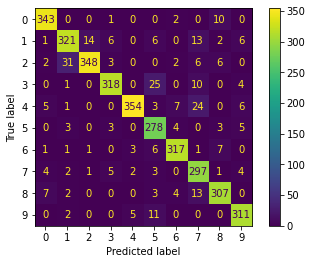

In [ ]:
DTC.fit(Xtrain,ytrain)
ypred=DTC.predict(Xtest)
acc=DTC.score(Xtest,ytest)*100
ConfusionMatrixDisplay(confusion_matrix(ypred, ytest)).plot()
print("Accuracy:",acc,"%")

#Apply bagging strategy

In [ ]:
svm_bagging_model = BaggingClassifier(base_estimator=svm, n_estimators=50, random_state=0)
dtree_bagging_model = BaggingClassifier(base_estimator=DTC, n_estimators=50, random_state=0)

#SVM Model with Bagging 

Accuracy: 97.88450543167524 %


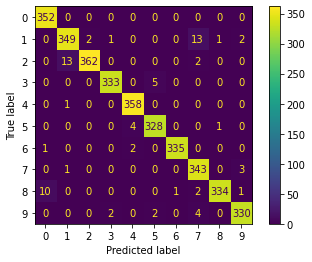

In [ ]:
svm_bagging_model.fit(Xtrain,ytrain)
ypredsvm=svm_bagging_model.predict(Xtest)
accsvm=svm_bagging_model.score(Xtest,ytest)*100
ConfusionMatrixDisplay(confusion_matrix(ypredsvm, ytest)).plot()
print("Accuracy:",accsvm,"%")

#Decision Tree Model with Bagging 

Accuracy: 94.08233276157804 %


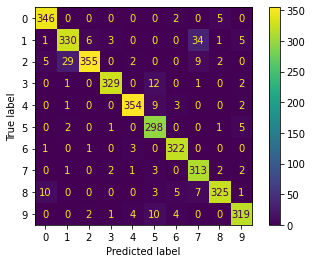

In [ ]:
dtree_bagging_model.fit(Xtrain,ytrain)
ypreddt=dtree_bagging_model.predict(Xtest)
accdt=dtree_bagging_model.score(Xtest,ytest)*100
ConfusionMatrixDisplay(confusion_matrix(ypreddt, ytest)).plot()
print("Accuracy:",accdt,"%")

#Find the best number of estimators as taking Decision Tree base estimator

In [ ]:
models=[DTC]
nlist=num(10,200,5)
n,s=create(models,nlist,Xtrain,ytrain,Xtest,ytest)

   score :0.94, Estimators:18.00

   score :0.94, Estimators:119.00

   score :0.94, Estimators:133.00

   score :0.94, Estimators:156.00

   score :0.94, Estimators:157.00



In [ ]:
s

[0.9362492853058891,
 0.9431103487707261,
 0.9431103487707261,
 0.9433962264150944,
 0.9436821040594625]

#Plot accuracy vs. number of Estimators. 

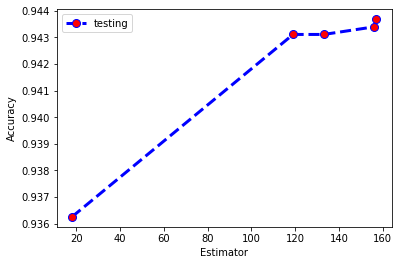

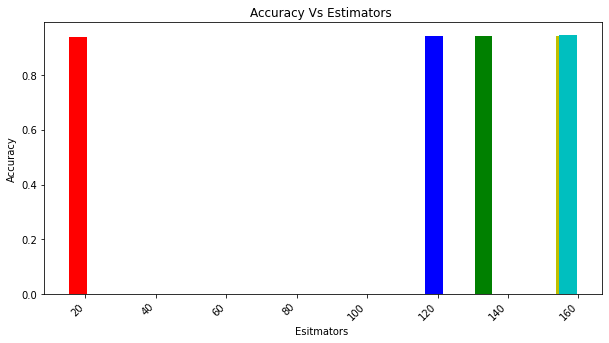

In [ ]:
plt.plot(n, s,color='b', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='r', markersize=8)
plt.xlabel('Estimator')
plt.ylabel('Accuracy')
plt.legend( ['testing'])
Barplot(s,n)

# GradientBoosting classifier

Looping for best estimator

 score :0.90, Estimators:18.00

 score :0.96, Estimators:119.00

 score :0.96, Estimators:133.00

 score :0.96, Estimators:156.00



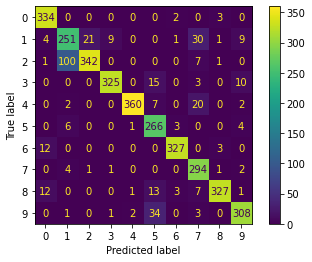

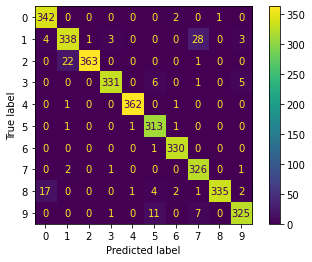

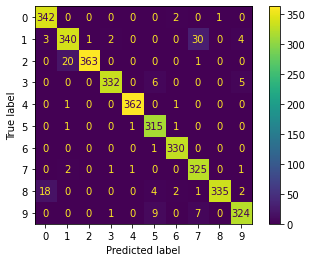

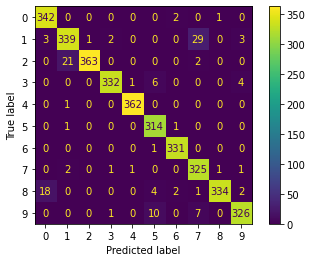

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
nl=num(10,200,4)
boostscoree=[]
for x in nl:
  clf = GradientBoostingClassifier(n_estimators=x,  random_state=0)
  clf.fit(Xtrain, ytrain)
  bscoree=clf.score(Xtest, ytest)
  print(' score :{:.2f}, Estimators:{:.2f}\n'.format(bscoree,x))
  ypredict1=clf.predict(Xtest)
  ConfusionMatrixDisplay(confusion_matrix(ypredict1, ytest)).plot()
  boostscoree.append(bscoree)

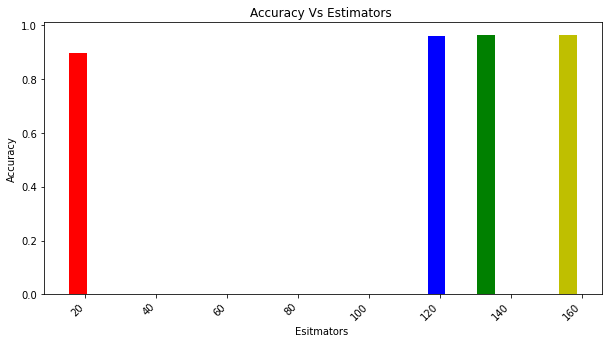

In [ ]:
Barplot(boostscoree,nl)

Looping over model with estimitor 156 to get the best learning rate

 score :0.96, Learning Rate:0.10

 score :0.96, Learning Rate:0.20

 score :0.96, Learning Rate:0.30

 score :0.96, Learning Rate:0.40

1.6689300537109375e-05


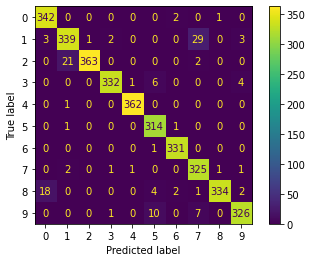

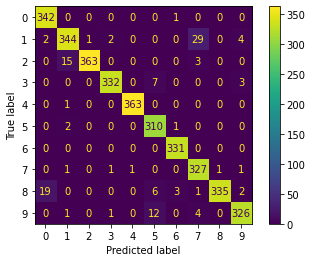

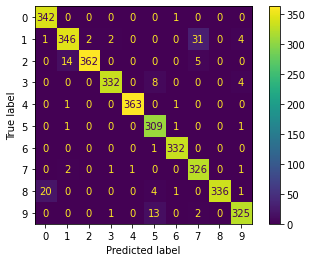

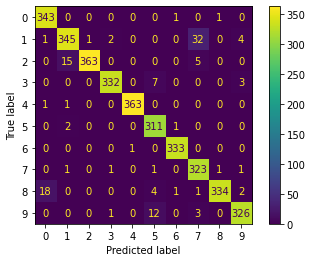

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
lr=[0.1,0.2,0.3,0.4]
boostscore=[]
for i in lr:
  clf = GradientBoostingClassifier(n_estimators=156, learning_rate=i, random_state=0)
  clf.fit(Xtrain, ytrain)
  bscore=clf.score(Xtest, ytest)
  print(' score :{:.2f}, Learning Rate:{:.2f}\n'.format(bscore,i))
  ypredict=clf.predict(Xtest)
  ConfusionMatrixDisplay(confusion_matrix(ypredict, ytest)).plot()
  boostscore.append(bscore)

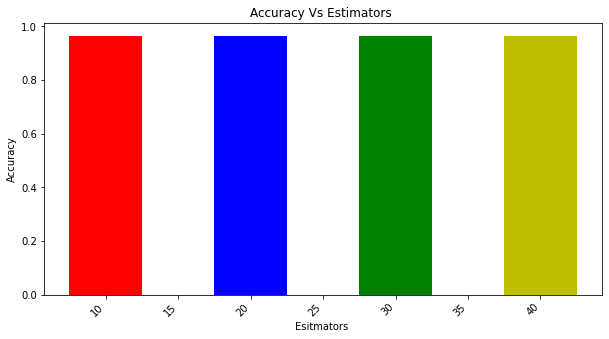

In [21]:
lrr=[10,20,30,40]  #for plotting bars purpose
Barplot(boostscore,lrr)

#Build XGBoost classifier

Accuracy 96.51229273870783 %


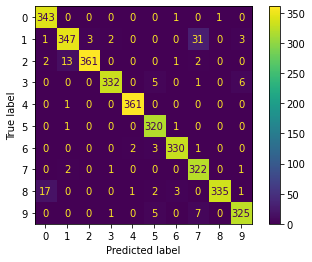

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="multi:softprob",learning_rate=0.3,n_estimators=156,random_state=0)
xgb_model.fit(Xtrain, ytrain)
xgbscore=xgb_model.score(Xtest, ytest)*100
y_predxgb = xgb_model.predict(Xtest)
ConfusionMatrixDisplay(confusion_matrix(y_predxgb, ytest)).plot()
print("Accuracy",xgbscore,"%")